# 1. 선 그래프 (Line Graph) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

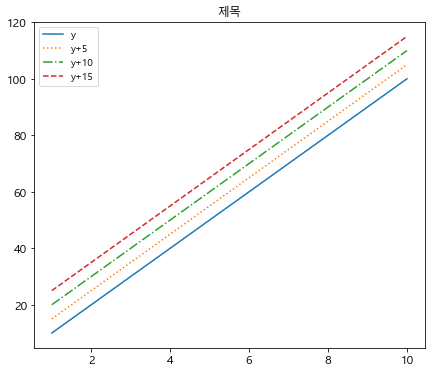

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

x = range(1, 11)
y = pd.Series(range(10, 110, 10))
y2 = y + 5
y3 = y + 10
y4 = y + 15

plt.figure(figsize=(7,6))
# (x축값, y축값)
plt.plot(x, y, label='y')
plt.plot(x, y2, label='y+5', linestyle=':')
plt.plot(x, y3, label='y+10', linestyle='-.')
plt.plot(x, y4, label='y+15', linestyle='--')
plt.title('제목')
plt.legend() #범례
plt.show()

#### 객체지향방식

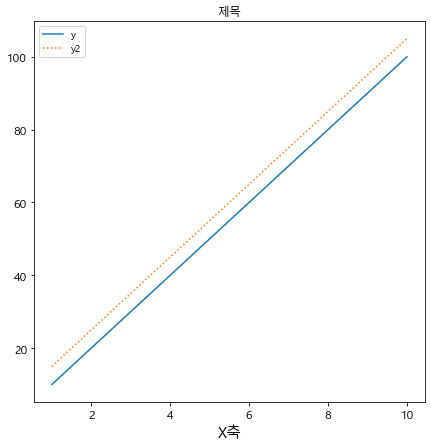

In [10]:
# 객체지향방식
# 1. Axes
fig = plt.figure(figsize=(7,7))
# fig 에 axes를 추가
# ax = fig.add_subplot(2,3,1)
ax = fig.gca()  #하나의 figure에 한개의 axes를 사용할 경우 GetCurrentAxes
ax.plot(x, y, label='y')
ax.plot(x, y2, linestyle=':', label='y2')
ax.set_title('제목')
ax.set_xlabel("X축")

ax.legend()
plt.show()

## 1.2 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [5]:
import pandas as pd
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.rename(columns={'최대농도(㎍/㎥/시)':'최대농도'}, inplace=True)
df.head()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354


#### 연도 흐름에 따른 최대농도의 변화량

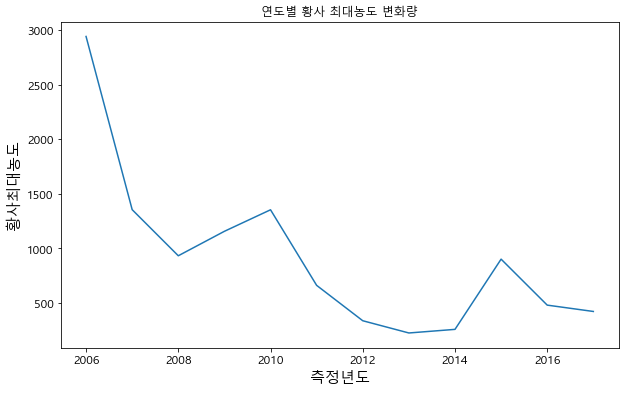

In [7]:
# X축: 시간, Y축: 값
plt.figure(figsize=(10,6))

plt.plot(df['년도'], df['최대농도'])
# axes 제목
plt.title('연도별 황사 최대농도 변화량')
# x, y축 label
plt.xlabel('측정년도')
plt.ylabel('황사최대농도')

plt.show()

## 1.3 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 선그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

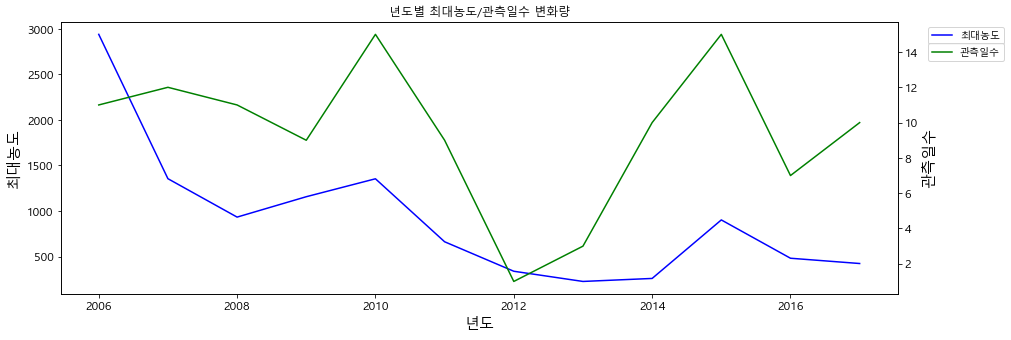

In [11]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,1,1)   #plt.gca(): AxesSubplot
ax2 = ax1.twinx()

ax1.plot(df['년도'], df['최대농도'], label='최대농도', color='blue')
ax2.plot(df['년도'], df['관측일수'], label='관측일수', color='green')

ax1.set_xlabel('년도')
ax1.set_ylabel("최대농도")
ax2.set_ylabel('관측일수')

ax1.set_title('년도별 최대농도/관측일수 변화량')


ax1.legend(bbox_to_anchor=(1.03,1), loc='upper left')
ax2.legend(bbox_to_anchor=(1.03,0.94), loc='upper left')
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

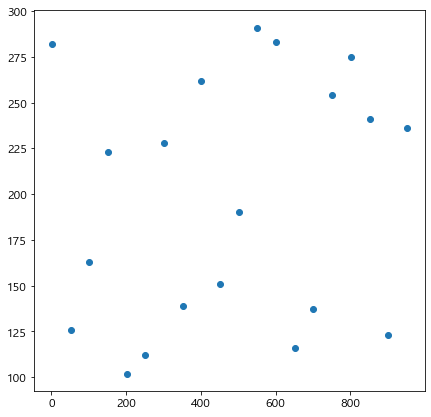

In [13]:
import numpy as np

x = np.arange(1,1000,50)  # 1 ~ 1000-1  +50
y = np.random.randint(100,300,20)  # 100 ~ 300-1 사이에서 임의의 정수 20개를 추출

plt.figure(figsize=(7,7))
plt.scatter(x, y)   # x와 y 같은 인덱스의 값끼리 묶어서 점을 찍는다.

plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 마커의 크기
    - 리스트형태(리스트, 튜플)로 지정
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

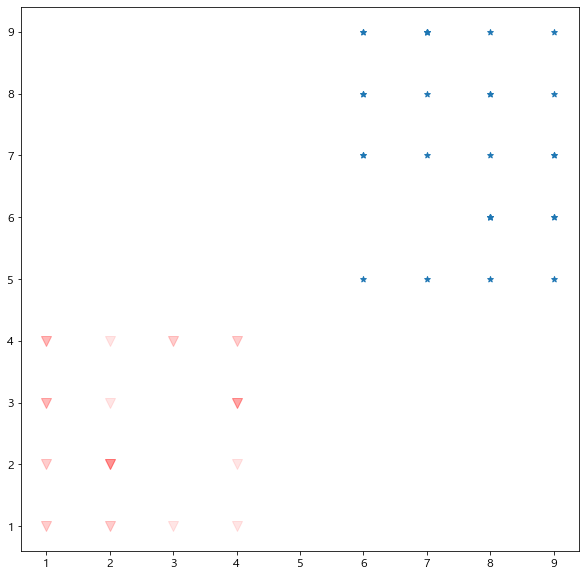

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x=np.random.randint(1,5,30), y=np.random.randint(1,5,30), 
            marker='v', #marker(점) 스타일
            color='red',
            s=100, # marker size
            alpha=0.1 )  # 투명도 0 ~ 1
plt.scatter(x=np.random.randint(5,10,30), y=np.random.randint(5,10,30), marker='*')
plt.show()

## 2.3 산점도 활용
### 경보 발령횟수와 관측일수 간의 관계

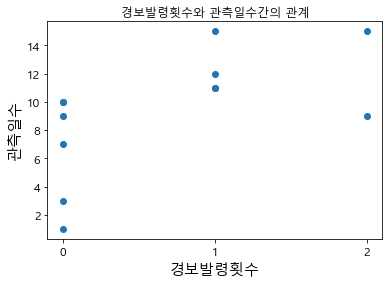

In [16]:
plt.scatter(df['경보 발령횟수'], df['관측일수'])

plt.title('경보발령횟수와 관측일수간의 관계')
plt.xlabel('경보발령횟수')
plt.ylabel('관측일수')

# x축 눈금(tick) 재조정 -> xtick
plt.xticks([0, 1, 2]) #(눈금의 위치, 눈금 label)  label생략->눈금의 value(값)이 label이 된다.
plt.show()

### 상관관계
- 두 컬럼(변수)간의 상관관계(한쪽의 값이 증가할때 다른쪽 값은 증가 or 감소 or 관계없음)를 계산
- 정성적판단: 산점도(scatter plot)
- 정량적판단: 상관계수
- 상관관계: 양의 상관계(증감이 같은것), 음의 상관관계(증감이 반대인 것)
- 상관계수:  -1 ~ +1 실수
- 음수 - 음의상관관계,  양수 - 양의상관관계, 0- 관계없다
- +-1 에 가까울수록 관계성 커진다. 0에 가까울 수록 관계성이 약해진다.
>- 1 ~ 0.7: 아주 강한 상관관계
>- 0.7 ~ 0.3: 강한 상관관계
>- 0.3 ~ 0.1: 약한 상관관계
>- 0.1 ~ 0 : 상관성(관계)이 없다. 

#### diamond dataset을 이용해서 산점도
- carat과 price간의 관계

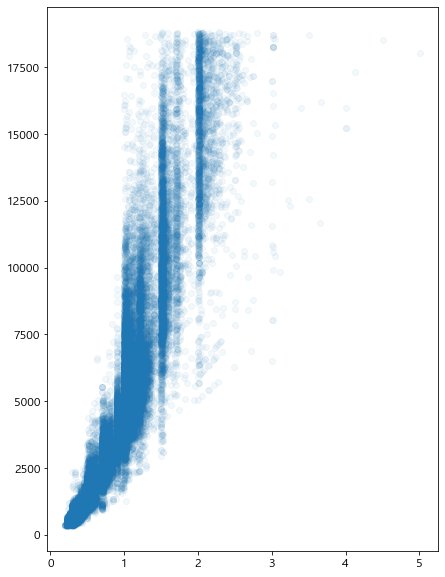

In [17]:
dia_df = pd.read_csv('data/diamonds.csv')

plt.figure(figsize=(7,10))
plt.scatter(dia_df['carat'], dia_df['price'], alpha=0.05)
plt.show()

#### 상관관계

In [18]:
dia_df[['carat', 'price']].corr()  #0.921591 : 아주 강한 양의 상관관계

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량을 막대 형식으로 나타낸 그래프
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비    
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

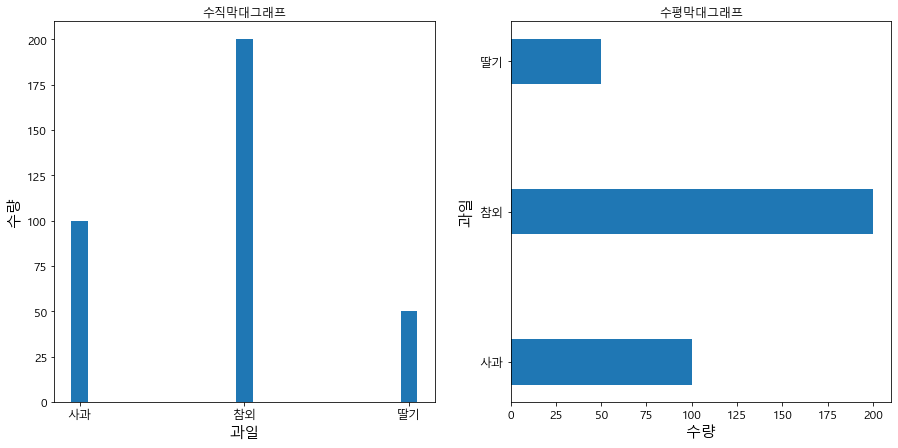

In [20]:
import matplotlib.pyplot as plt

fruits = ['사과', '참외', '딸기']
counts = [100, 200, 50] #사과, 참외, 딸기의 개수

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.bar(fruits, counts, width=0.1)  #(대상, 수량)  #width=두께 (0 ~ 1 실수)
plt.title('수직막대그래프')
plt.xlabel('과일')
plt.ylabel('수량')


plt.subplot(1,2,2)
plt.barh(fruits, counts, height=0.3)  #(대상, 수량)
plt.title('수평막대그래프')
plt.xlabel('수량')
plt.ylabel('과일')

plt.show()

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)
- 계절별 강수량

In [22]:
df = pd.read_excel('data/강수량.xlsx')
df

,계절,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
1,여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
2,가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
3,겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


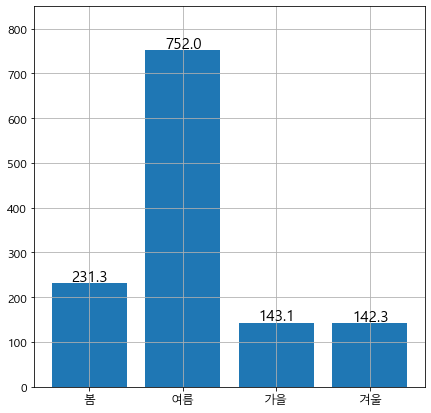

In [27]:
# 2009년 계절별 강수량 비교
plt.figure(figsize=(7,7))
plt.bar(df['계절'], df[2009])

for x_v, y_v in enumerate(df[2009]):
    plt.text(x_v-0.19, y_v+5, y_v, fontsize=15)

plt.ylim(0, 850)  #y축의 값의 범위를 지정

plt.grid(True)
plt.show()

# 4. 파이차트 그리기
## 4.1 파이차트
- 각 범주(Category)가 데이터에서 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
            

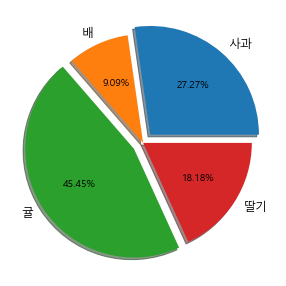

In [42]:
import matplotlib.pyplot as plt

fruits = ['사과', '배', '귤', '딸기']
counts = [30, 10, 50, 20]

plt.figure(figsize=(5,5))
plt.pie(counts, labels=fruits,   #수량, labels=대상
        autopct='%.2f%%', 
        explode=[0.1,0,0.1,0], shadow=True)

plt.show()

## 4.2 파이차트 활용
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreahtml5.kr/front/stats/browser/browserUseStats.do

In [53]:
# converters={컬럼명:타입}   컬럼을 지정한 타입(numpy의 데이터타입) 으로 읽어들인다.
df = pd.read_excel('data/webbrowser_share.xls',converters={'date':np.str})
# date를 index
df.set_index('date', inplace=True)
cols = df.columns
wb_df = df[cols[:7]].copy()
wb_df['기타'] = df[cols[7:]].sum(axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_21248\1266799426.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = pd.read_excel('data/webbrowser_share.xls',converters={'date':np.str})


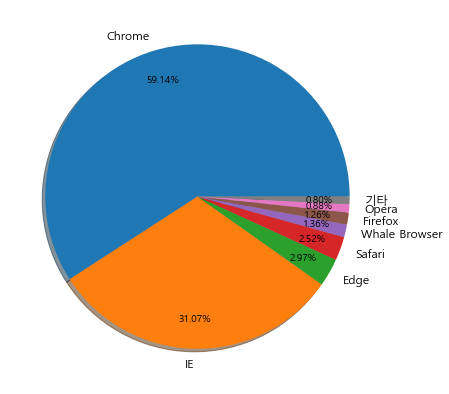

In [54]:
# 2018.08 월 WB들의 점유율을 pie chart 로 확인
plt.figure(figsize=(7,7))

plt.pie(wb_df.iloc[0], labels=wb_df.columns, 
        autopct='%.2f%%', 
        pctdistance=0.8, 
        labeldistance=1.1,
        shadow=True)
plt.show()

# 5 히스토그램 그리기
## .1 히스토그램
- 표로 된 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 특정 그룹안에 값의 빈도를 나타낸 표
    - 주로 연속형 자료를 특정 구간으로 나눠 그 빈도를 확인한다.
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

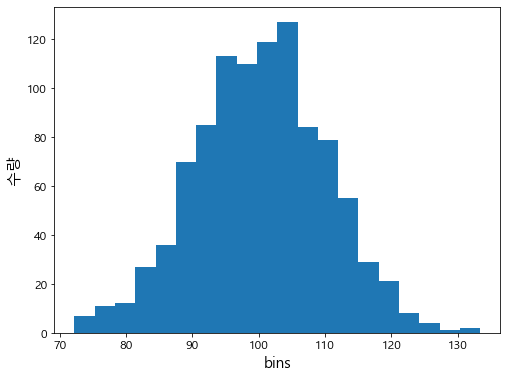

In [57]:
data = np.random.normal(100, 10, 1000)
data_s = pd.Series(data)  #ndarray를 series 변환

plt.figure(figsize=(8,6))
plt.hist(data_s, bins=20)
plt.xlabel('bins')
plt.ylabel('수량')
plt.show()

## 5.2 히스토그램 활용
- tips.csv
    - 식당에서 팁을 지불한 손님의 정보를 모아둔 데이터 셋    

In [58]:
tips = pd.read_csv('data/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


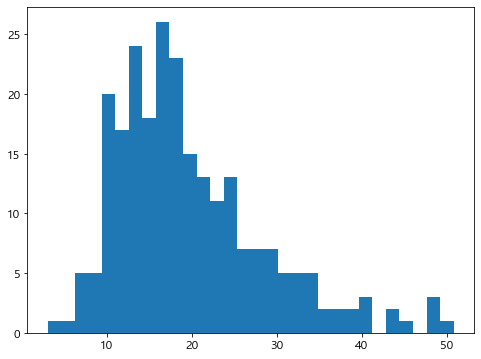

In [64]:
plt.figure(figsize=(8,6))
plt.hist(tips['total_bill'], bins=30)
plt.show()

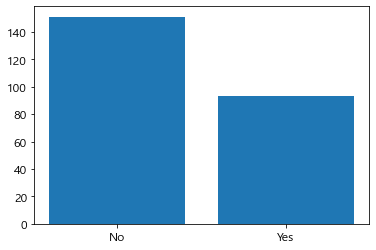

In [69]:
r = tips['smoker'].value_counts()
plt.bar(r.index, r)
plt.show()

# 6. 상자그래프(Boxplot) 그리기
## 6.1 상자그래프란
- 연속형 값들의 분포, 이상치(극단값)를 확인할 때 사용
    - 값들의 중앙값(중위수), 사분위수, 최대/최소값을 보여주어 값들의 분포를 확인 할때 사용한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - 극단치 : 1사분위와 3사분위에서 $IQR(3사분위수-1사분위수) * whis$ 범위 이상 떨어진 값들

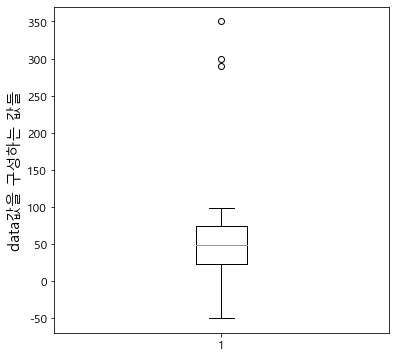

In [71]:
data = pd.Series(np.random.randint(1, 100, 1000))  # 1 ~ 100-1 사이의 임의의 정수 1000개를 생성
data[:5]  = [300, 290, -50, -40, 350]

plt.figure(figsize=(6,6))
plt.boxplot(data)
plt.ylabel('data값을 구성하는 값들')
plt.show()

- 연속형 값들의 분포 확인 - 히스토그램, boxplot
    - histogram: 연속된 값들을 그룹으로 나눈 뒤 수량을 시각화
    - boxplot:   값의 범위를 기준으로 시각확 (4분위수를 중심으로) => 수량정보는 없다.

## 상자그래프 활용
- tips_df 에서 tip의 분포를 상자그래프로 확인

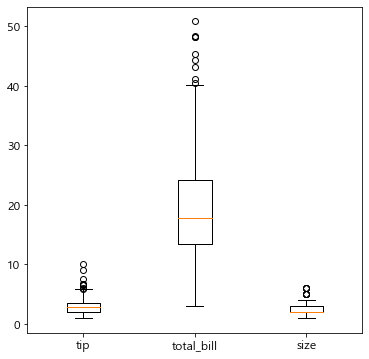

In [78]:
plt.figure(figsize=(6,6))
plt.boxplot([tips['tip'], tips['total_bill'], tips['size']], labels=['tip', 'total_bill', 'size'])
plt.show()

- 남녀별 tip의 분포글 하나의 boxplot에서 그려 분포 비교
- 한 그래프에서 여러 데이터셋의 boxplot을 그리기.
    - 2차원 배열형태의 구조로로 데이터를 제공
    - 행(axis=0) 별로 그래프를 그린다.

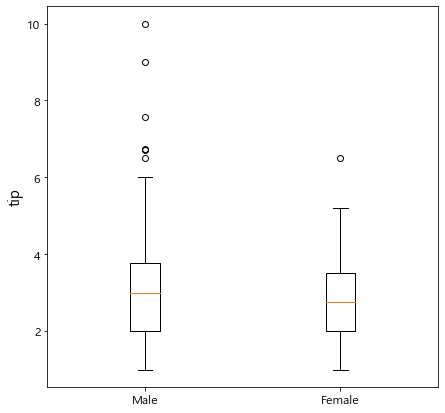

In [79]:
m_tip = tips.loc[tips['sex'] == 'Male', 'tip']
f_tip = tips.loc[tips['sex'] == 'Female', 'tip']

plt.figure(figsize=(7, 7))

plt.boxplot([m_tip, f_tip], labels=['Male', 'Female'])
plt.ylabel('tip')
plt.show()